# Recurrent Convolutional Neural Network

## Import Dependencies

In [178]:
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import utils; reload(utils)

from utils import *
from __future__ import print_function
from sklearn.metrics import confusion_matrix, f1_score

In [152]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

## Configure Parameters

In [193]:
# Embedding
embedding_size = 128
max_features = 20000
maxlen = 100

# Convolution
kernel_size = 5
pool_size = 4
filters = 64

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

## Data Preparation

In [194]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [195]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

Train data size: (25000, 100)
Test data size: (25000, 100)


## Modelling

In [199]:
model = Sequential()
model.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen,
                    trainable=True))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 128)          2560000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total para

## Evaluation

In [200]:
# Train the model
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 154s - loss: 0.3947 - acc: 0.8128 - val_loss: 0.3307 - val_acc: 0.8572
Epoch 2/2
25000/25000 [==============================] - 155s - loss: 0.1965 - acc: 0.9248 - val_loss: 0.3495 - val_acc: 0.8511


In [202]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
preds = model.predict_classes(x_test, batch_size=batch_size)

24960/25000 [============================>.] - ETA: 0s

In [203]:
# Save the model weights
model_path = 'data/imdb/models/'
model.save_weights(model_path + 'rcnn.model')

[[11051  1449]
 [ 2273 10227]]


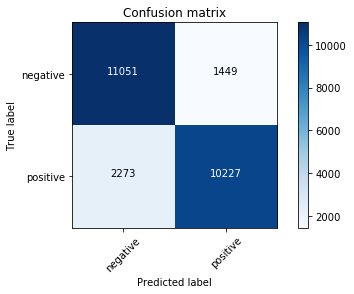

In [204]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [205]:
# F1 score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

Test accuracy: 0.85111999414
Test score (loss): 0.349481368339

F1 Score (Macro): 0.850958086588
F1 Score (Micro): 0.85112
